![](evolution.jpg)

# ??

![](rover.jpg)

## References

- Mars rover: [space suit materials](https://mars.nasa.gov/mars2020/spacecraft/rover/markings/#space-suit-materials)
- wikipedia: [1951 USAF resolution test chart](https://en.wikipedia.org/wiki/1951_USAF_resolution_test_chart)
- Edmond Optics: [Introduction to Modulation Transfer Function](https://www.edmundoptics.com/knowledge-center/application-notes/optics/introduction-to-modulation-transfer-function/)
- Edmond Optics: [MTF Curves and Lens Performance](https://www.edmundoptics.com/knowledge-center/application-notes/imaging/mtf-curves-and-lens-performance/)
- Edmond Optics: [The Airy Disk and Diffraction Limit](https://www.edmundoptics.com/knowledge-center/application-notes/imaging/limitations-on-resolution-and-contrast-the-airy-disk/)


## Spacesuit Samples and SHERLOC Camera

<img src="cal-targets.jpg" width="80%">

<img src="https://mars.nasa.gov/system/resources/detail_files/25657_geocache.jpg" width="400px">

Four of the five space suit samples are made of materials used in current space suits, and could inform what future astronauts will wear when they explore Earth's Moon or Mars. Samples of Teflon, Vectran, and Dacron will remain exposed to the intense ultraviolet radiation and cold temperatures of Mars. The ACI and the WATSON cameras will periodically take magnified images of these samples. Space suit specialists on Earth will study those images to see if the materials break down, and how fast.

The most detailed cal target disk is composed of two parts, and serves two critical functions. The bottom layer, made of opal glass, has markings in blue chrome, and is covered by a layer of polycarbonate, used to make the visors on astronaut helmets. By peering at calibration marks through the polycarbonate during Perseverance's mission, the cameras will note if and when the polycarbonate starts to break down. This is like when you start to notice that the lenses of your glasses are getting scratched over time.

The patterns on the upper portion of the opal disk feature tiny vertical lines from an optical calibration system developed by the United States Air Force. In the center there is a set of letters and numbers, resembling the address in London where the fictional Sherlock Holmes lived. This code is called a geocache “coin.” Geocaching is an outdoor activity in which people use maps or Global Positioning System (GPS) coordinates to find hidden objects, or caches. When someone finds a cache, they record their discovery in a log book or online, and replace it for the next person to find. This geocache is the first one of it's kind on Mars and future explorers may log it in the future. Until then, a future mission to Mars will recover the sample tubes left behind by Perseverance. Within this precious “cache” scientists will search for signs of ancient life, once the samples are brought back to Earth.

On the lower section of the opal disk is a row of tiny figures that seem to be dancing. These figures can also be used for optical calibration, if the camera cannot see the top row of the disk. The row of characters is a cipher, or code, called “The Dancing Man.” This code appears in “The Adventure of the Dancing Men,” published as a short story by Sherlock Holmes author Sir Arthur Conan Doyle in 1903. In the story, Holmes was able to crack the code and solve the mystery. We will crack this code for you: the figures spell out “Cache me if you can.”

## Modulation Transfer Function (MTF)

Using a calibration target, we can measure a camera's performance and determine its MTF. The higher the MTF, the more likely we are able to determine two closely spaced objects.

![](100.webp)

![](20.webp)

So how do we measure this? 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/1951usaf_test_target.jpg/400px-1951usaf_test_target.jpg)

Two key performance parameters for a camera system are:

- **Resolution:** an imaging system's ability to distinguish an object's details
- **Contrast:** the difference in illumination that makes objects distinguishable 

The target's bar graphic is adapted from a standardized U.S. Air Force chart for testing camera resolution. Numbers on it refer to how many of the black-white cycles fit into one millimeter. For example, in the largest set of bars, labeled 1.0, each black bar is one-half millimeter wide and each white space between bars is another one-half millimeter. One millimeter is about 0.04 inch. 

![](resolve.webp)

In practice, the spatial resolution of an imaging system is measured by simply inspecting the system's image of the slide. The largest element observed without distinct image contrast indicates the approximate resolution limit. This element's label is noted by the observer (each group, and each element within a group, is labeled with a single digit). This pair of digits indicates a given element's row and column location in the series table, which in turn defines the spatial frequency of each element, and thus the available resolution of the system.

![](contrast.webp)

$$
percentContrast = \frac {I_{max} - I_{min}} {I_{max} + I_{min}}
$$

![](a.webp)

Now for a given wavelength ($\lambda$), camera's f/# and spatial resolution (lines/mm), we can calculate the diffraction limit ($\zeta_c$) and the MTF for an aberation free lense.

$$
MTF(\zeta) = \frac {2}{\pi}(\phi - cos \phi sin \phi) \\
\phi = cos^{-1} \frac {\zeta}{\zeta_c} \\
\zeta_c = \frac {1}{\lambda f/ \#}
$$

In [33]:
from matplotlib import pyplot as plt
from math import sin, cos, acos, pi

In [124]:
# raspberry pi camera
# need things in mm for correct units
fw = 500e-9  # visible light wavelength [nm] (green)
f = 3.04     # focal length [mm]
D = 1.25     # appature diameter of camera [mm] 
fnum = f/D   # f-number

mtf = []
pp = []

for z in range(100):
    zc = 1/(fw*fnum) # diffration limit, 1/mm
    p = acos(z/zc)   # unitless
    p=0.01*z
    pp.append(p)???
    mtf.append(2/pi*(p-cos(p)*sin(p)) * 100) # percent

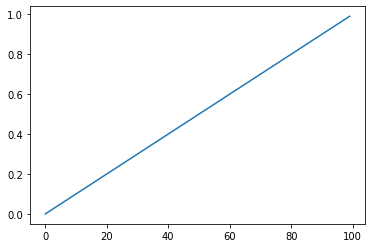

In [125]:
plt.plot(pp);

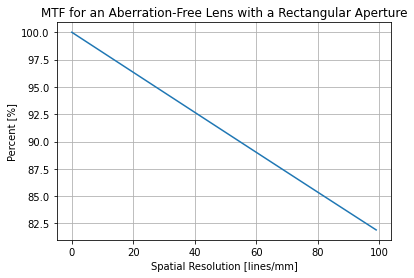

In [52]:
# none of this makes sense??
plt.plot(mtf)
# plt.axis("equal")
plt.grid(True)
plt.title("MTF for an Aberration-Free Lens with a Rectangular Aperture")
plt.ylabel("Percent [%]")
plt.xlabel("Spatial Resolution [lines/mm]");

In [50]:
mtf

[100.0,
 99.8166535689227,
 99.63330751803329,
 99.44996222752201,
 99.26661807758381,
 99.08327544842084,
 98.89993472024454,
 98.71659627327834,
 98.53326048775978,
 98.34992774394294,
 98.16659842210089,
 97.98327290252796,
 97.79995156554216,
 97.61663479148748,
 97.43332296073642,
 97.25001645369211,
 97.06671565079095,
 96.88342093250483,
 96.70013267934344,
 96.51685127185688]

![](header.jpg)

## The Airy Patter and Diffraction Limit

<img src="airy.webp" width="300px">

The first three dark rings occur at **radii** of 1.22, 2.23, and 3.24 $\lambda$/D respecively.

$$
airy = 2 \cdot 1.22 \lambda \frac {f}{D} = 2.44 \lambda \cdot f/\#
$$

Every lens has an upper-performance limit dictated by the laws of physics and the Airy disk, known as the diffraction limit. This limit is the theoretical maximum resolving power of the lens given in line pairs per millimeter (lines/mm). A perfect lens, not limited by design, will still be diffraction limited.

This limit is the point where two Airy patterns are no longer distinguishable from each other. The diffraction-limited resolution, often referred to as the cutoff frequency of a lens, is calculated using the lens f/# and the wavelength of light. 

$$
\zeta_c = \frac {1}{\lambda f/ \#}
$$

When the diffraction limit is reached, the lens is incapable of resolving greater frequencies.

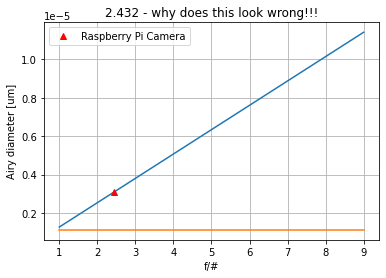

In [109]:
def airyDisk(wavelength, fnumber):
    """
    wavelenght: length of light wave in nano-meters (um)
    fnumber: focal length over appature diameter (unitless)
    
    returns: 2.44*wavelength*fnumber
    """
    return 2.44*wavelength*fnumber

air = []
fnum = []
pix = []

fw = 520e-9  # nm
f = 3.04     # focal length [mm]
D = 1.25     # appature diameter of camera [mm] 
pifnum = f/D # f-number
pipixel  = 1.12e-6 # 1.12um pixel size

for fn in range(1,10):
    a = airyDisk(fw, fn) # um
    air.append(a)
    fnum.append(fn)
    pix.append(pipixel)
    
# if this is right, then this has a Q of a 4 ... wtf?
plt.plot(fnum, air)
plt.plot(fnum, pix)
plt.plot(pifnum, airyDisk(fw, pifnum), 'r^', label="Raspberry Pi Camera")
plt.grid(True)
plt.legend()
plt.xlabel("f/#")
plt.ylabel("Airy diameter [um]")
plt.title(f"{pifnum} - why does this look wrong!!!");

In [119]:
# isn't this a shit Q-factor?
print(f"Pi Camera Quality Factor: {airyDisk(fw, pifnum)/pipixel: 0.1f}")

Pi Camera Quality Factor:  2.8


# F-Number (f/#) or F-Stop

The f/# is a ratio of focal length to appature such that you can think of it as a ratio or 1/# (from the f/# notation).

![](dof2.jpg)

Thus as seen above, the smaller the f/#, the larger the open appature, the more light that is allowed onto the focal plane. Additionally, the smaller an f/#, the smaller the depth of field is and how the image seems to be focused on one location while the rest of the image is out of focus. This can create some interesting images that focus a viewer attention to key areas. conversly, a larger f/# can bring the entire image into focus.

| f/#   | DOF   | FPA Light | Moving Subject |
|-------|-------|-----------|----------------|
| small | small | large     | crisp          |
| large | large | small     | blur           |

The f-number N is:

$$
N = \frac {f}{D}
$$

where $f$  is the focal length and D is the entrence appature. Some airy disk sizes calculated for various wavelengths and f/#'s.

| Color  | $\lambda$ | f/1.4 | f/2.8 | f/4  | f/8   | f/16  |
|--------|-----------|-------|-------|------|-------|-------|
| NIR    | 880       | 3.01  | 6.01  | 8.59 | 17.18 | 34.36 |
| Red    | 660       | 2.25  | 4.51  | 6.44 | 12.88 | 25.77 |
| Green  | 520       | 1.78  | 3.55  | 5.08 | 10.15 | 20.30 |
| Blue   | 470       | 1.61  | 3.21  | 4.59 | 9.17  | 18.35 |
| Violet | 405       | 1.38  | 2.77  | 3.95 | 7.91  | 15.81 |

- wikipedia: [f-number](https://en.wikipedia.org/wiki/F-number)

In [99]:
airyDisk(880, 1.4)

3006.0799999999995

In [98]:
airyDisk(880,2.8)

6012.159999999999

In [126]:
1/(1.4*520e-9)

1373626.3736263737